## Homework # 03_20141697 Kim Hyojun

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import CCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns

##### 1.

In [2]:
X = pd.read_csv("C:/Users/hyojun/OneDrive/OneDrive_2019-11-22/19년 2학기/multivariate/hw3_data/data.csv", header=None, 
                   names=["x1", "x2", "x3" ,"x4", "x5", "y1", "y2", "y3", "y4", "y5"])

In [3]:
# data.shape

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)
data = pd.DataFrame(X_scaled,
                    columns=["x1", "x2", "x3" ,"x4", "x5", "y1", "y2", "y3", "y4", "y5"])
print(np.mean(X_scaled), np.std(X_scaled))
# data.head()

5.581302456121633e-17 1.0


###### A.

In [5]:
corr_mat = data.corr()
corr_mat

,x1,x2,x3,x4,x5,y1,y2,y3,y4,y5
x1,1.000000,-0.477863,-0.221802,0.409131,0.617486,0.579937,0.460712,0.569456,0.388698,0.052577
x2,-0.477863,1.000000,-0.145735,-0.126709,-0.718881,-0.378982,-0.252252,-0.394464,-0.177995,0.049399
x3,-0.221802,-0.145735,1.000000,-0.280201,0.068013,-0.001252,-0.110698,-0.108184,0.074044,0.236681
x4,0.409131,-0.126709,-0.280201,1.000000,0.246270,0.269720,0.131833,0.295294,0.222776,-0.214933
x5,0.617486,-0.718881,0.068013,0.246270,1.000000,0.372690,0.212623,0.367736,0.260918,-0.026300
y1,0.579937,-0.378982,-0.001252,0.269720,0.372690,1.000000,0.535123,0.917500,0.673948,-0.043544
y2,0.460712,-0.252252,-0.110698,0.131833,0.212623,0.535123,1.000000,0.515213,0.374555,-0.037595
y3,0.569456,-0.394464,-0.108184,0.295294,0.367736,0.917500,0.515213,1.000000,0.588394,-0.039540
y4,0.388698,-0.177995,0.074044,0.222776,0.260918,0.673948,0.374555,0.588394,1.000000,-0.065220
y5,0.052577,0.049399,0.236681,-0.214933,-0.026300,-0.043544,-0.037595,-0.039540,-0.065220,1.000000


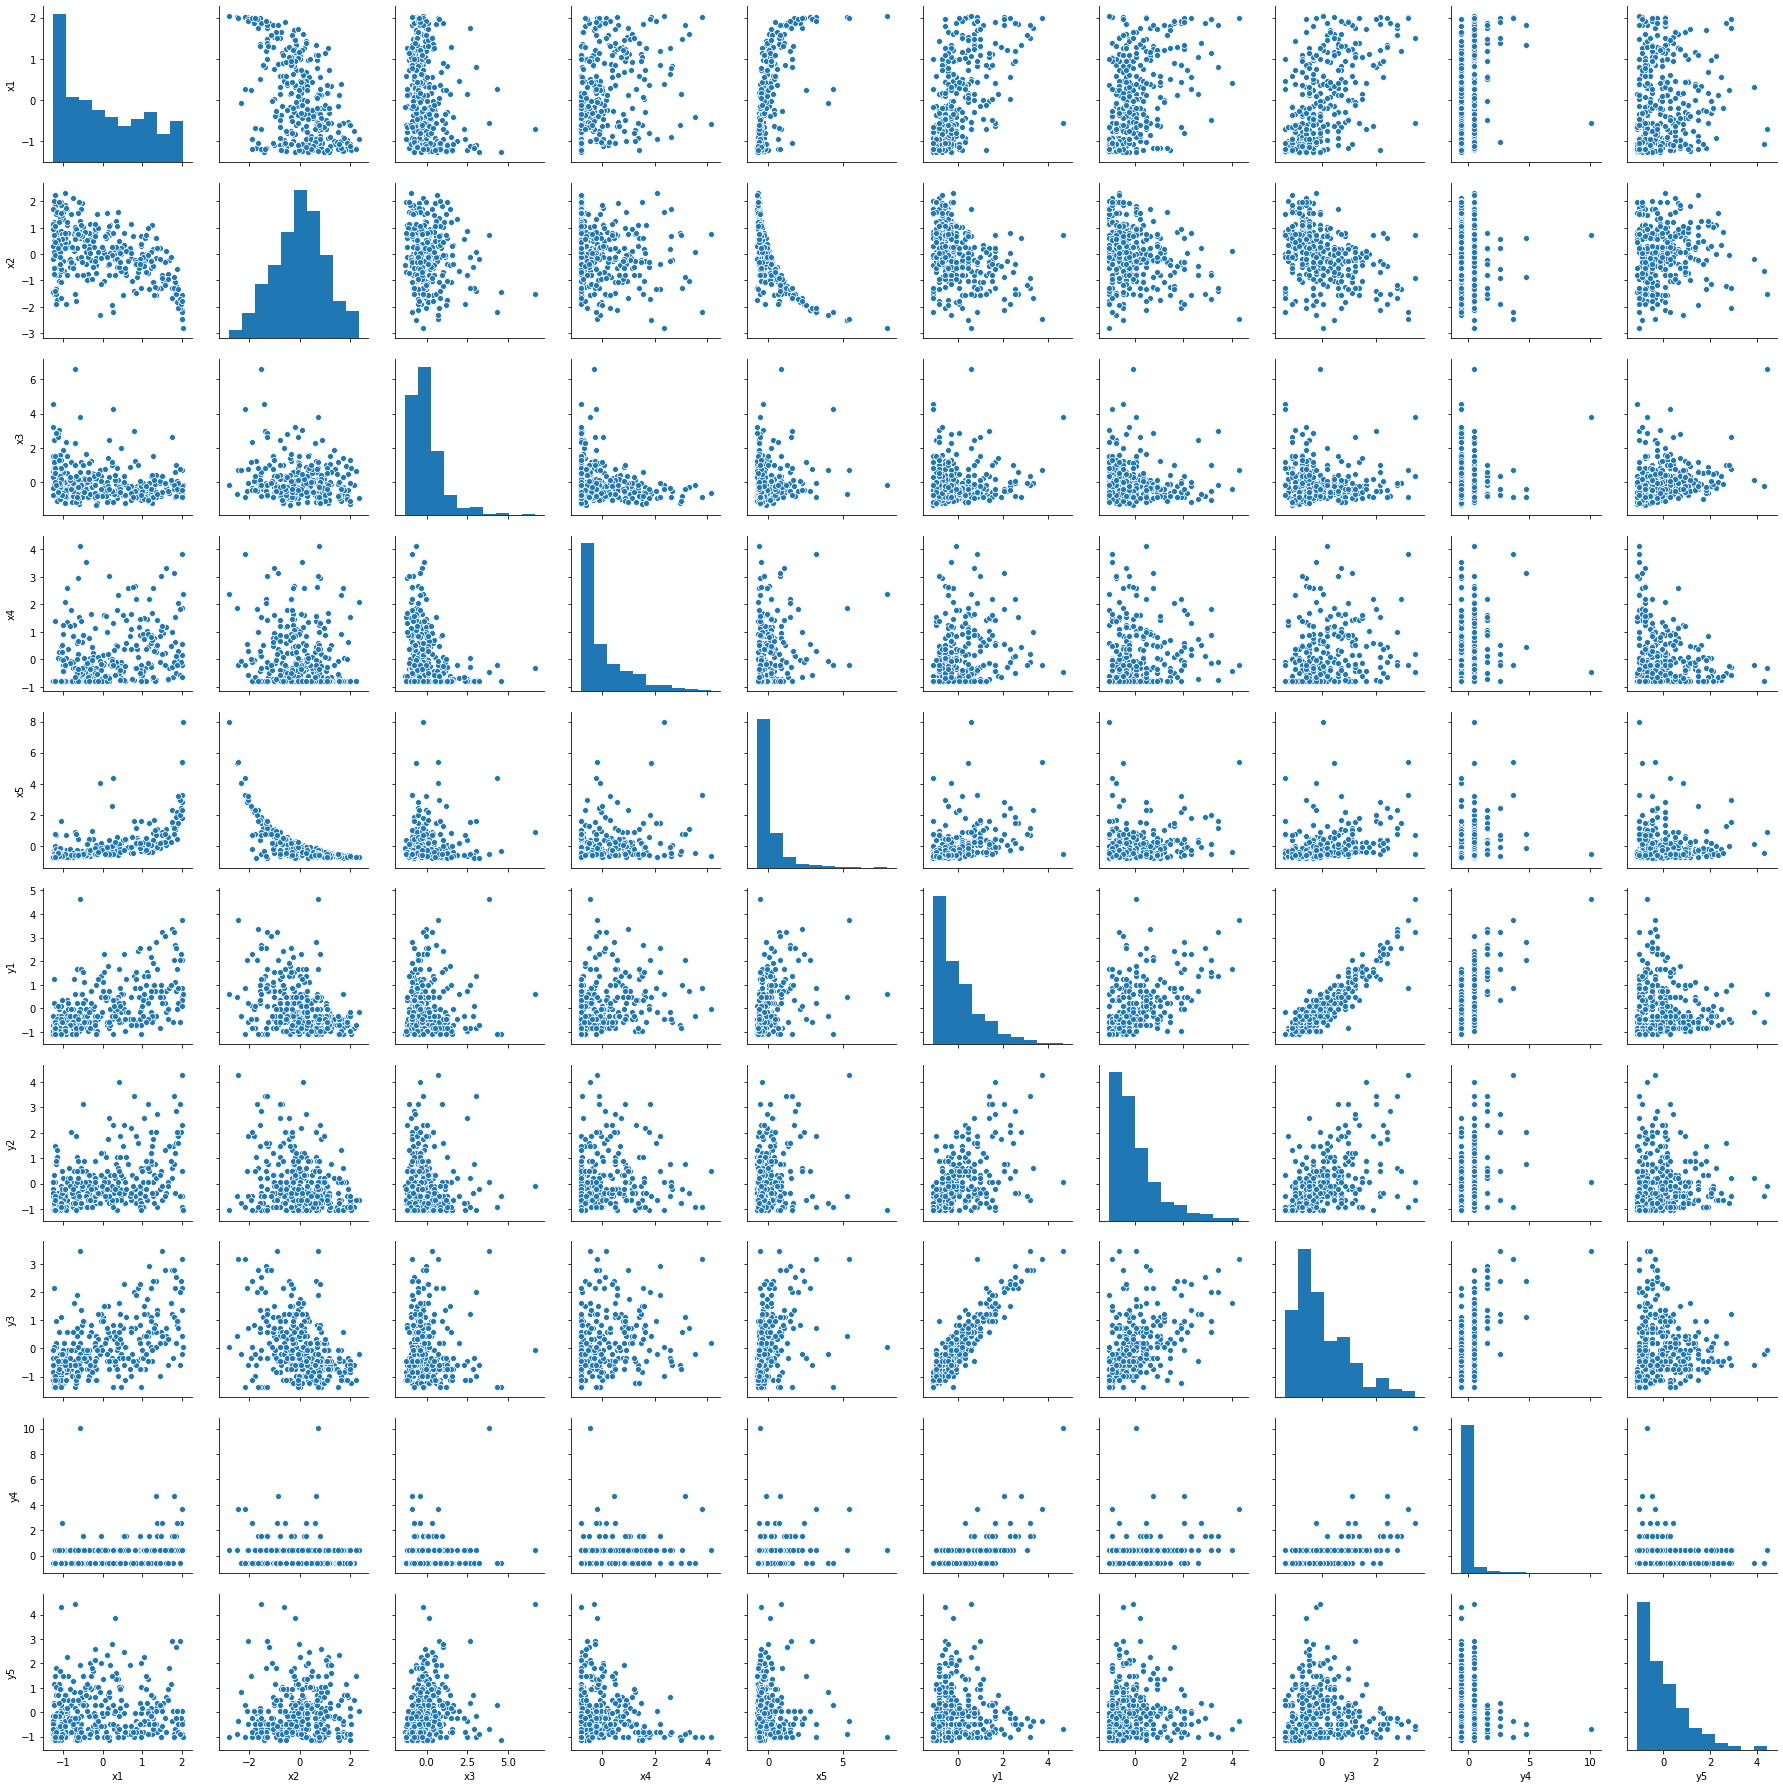

In [6]:
sns.pairplot(data)

# Maximum Correlation coefficient is between X1 and Y1, 0.579937

###### (B)

In [7]:
xvar = ['x1', 'x2', 'x3', 'x4', 'x5']
yvar = ['y1', 'y2', 'y3', 'y4' , 'y5'] 

x_mat =  data[xvar]
y_mat = data[yvar]

In [8]:
n_components = 5
cca = CCA(n_components= 5)
cca.fit(x_mat, y_mat)


CCA(copy=True, max_iter=500, n_components=5, scale=True, tol=1e-06)

In [9]:
X_c, Y_c = cca.transform(x_mat, y_mat)

a = pd.DataFrame(X_c)
b = pd.DataFrame(Y_c)

In [10]:
for i in range(n_components):
    corr = np.corrcoef(X_c[:,i], Y_c[:,i])[0,1]
    print(np.round(corr, 4))
    
# In case of 1st canonical correlation which is 0.6424. 
# it is greater than maximum correlation value in previous A which is 0.579937

0.6424
0.4834
0.2649
0.1139
0.0321


###### (C)

In [11]:
x_loading = pd.DataFrame(cca.x_loadings_,  columns = ['a1', 'a2', 'a3', 'a4', 'a5'])
x_loading

,a1,a2,a3,a4,a5
0,1.108036,-0.135706,0.049171,-0.250928,0.175752
1,-0.674506,0.384909,-0.070006,-0.783670,-0.318242
2,-0.013713,0.925607,0.334490,0.640082,-0.071794
3,0.389408,-0.559731,0.828488,-0.275616,-0.407387
4,0.642676,-0.177081,0.457486,0.232377,0.834694


In [12]:
x_loading['a1']

0    1.108036
1   -0.674506
2   -0.013713
3    0.389408
4    0.642676
Name: a1, dtype: float64

In [13]:
y_loading = pd.DataFrame(cca.y_loadings_, columns = ['b1', 'b2', 'b3', 'b4', 'b5'])
y_loading

,b1,b2,b3,b4,b5
0,0.711477,-0.138729,0.327362,0.267156,-0.066809
1,0.553424,-0.261353,-0.428060,-0.700962,-0.531269
2,0.678784,-0.618094,0.204915,0.107563,0.349578
3,0.467556,0.323663,0.684775,-0.786791,0.034916
4,0.118023,1.383579,-0.476653,0.117888,0.768028


In [14]:
y_loading['b1']

0    0.711477
1    0.553424
2    0.678784
3    0.467556
4    0.118023
Name: b1, dtype: float64

###### (D)

In [15]:
r = [0.6424, 0.4834, 0.2649, 0.1139, 0.0321]
lamda = [0.413, 0.703, 0.9156, 0.986, 0.999]
v = [287.3, 114.7, 28.4, 4.6, 0.3]
df = [25,16,9,4,1]
reject = ['O', 'O', 'O', "X", "X"]

q1 = pd.DataFrame(columns=['r(t,u)', 'lamda', 'v', 'df', 'can reject h0'])

q1['r(t,u)'] = r
q1['lamda'] = lamda
q1['v'] = v
q1['df'] = df
q1['can reject h0'] = reject

# 0 : 1~5 
# 1 : 2~5
# 3 : 3~5
# 4 : 4~5
# 5 : 5 
# Based on this, we can keep the first three covariates pairs

##### 2.

In [16]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header =None)

In [17]:
# df_wine

In [18]:
df_wine.columns = ["origin", "x1", "x2", "x3" ,"x4", "x5", "x6","x7", "x8", "x9" ,"x10", "x11", "x12", "x13"]

In [19]:
x, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)
cov_mat = np.cov(x_train_std.T)

###### (A)

In [20]:
eigen_vals , eigen_vecs = np.linalg.eig(cov_mat)

In [21]:
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


In [36]:
print('\nEigenvecters \n%s' % eigen_vecs)
pd.DataFrame(eigen_vecs)


Eigenvecters 
[[ 1.46698114e-01  5.04170789e-01 -1.17235150e-01  2.06254611e-01
  -1.87815947e-01 -1.48851318e-01 -1.79263662e-01 -5.54687162e-02
  -4.03054922e-01 -4.17197583e-01  2.75660860e-01  4.03567189e-01
   4.13320786e-04]
 [-2.42245536e-01  2.42168894e-01  1.49946576e-01  1.30489298e-01
   5.68639776e-01 -2.69052764e-01 -5.92636731e-01  3.32731614e-02
  -1.01833706e-01  2.17101488e-01 -8.13845005e-02 -1.52474999e-01
  -8.78560762e-02]
 [-2.99344215e-02  2.86984836e-01  6.56394387e-01  1.51536318e-02
  -2.99209426e-01 -9.33386061e-02  6.07334578e-02 -1.00618575e-01
   3.51841423e-01  1.28549846e-01 -1.29751275e-02  1.68376064e-01
  -4.52518598e-01]
 [-2.55190023e-01 -6.46871827e-02  5.84282337e-01 -9.04220851e-02
  -4.12499478e-02 -1.01342392e-01  2.50323869e-01  5.61658566e-02
  -5.00457282e-01  4.73344124e-02  9.89088030e-02 -6.70902926e-02
   4.86169765e-01]
 [ 1.20797723e-01  2.29953850e-01  8.22627466e-02 -8.39128346e-01
  -2.71971315e-02  1.12567350e-01 -2.85240559e-01  

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.146698,0.504171,-0.117235,0.206255,-0.187816,-0.148851,-0.179264,-0.055469,-0.403055,-0.417198,0.275661,0.403567,0.000413
1,-0.242246,0.242169,0.149947,0.130489,0.568640,-0.269053,-0.592637,0.033273,-0.101834,0.217101,-0.081385,-0.152475,-0.087856
2,-0.029934,0.286985,0.656394,0.015154,-0.299209,-0.093339,0.060733,-0.100619,0.351841,0.128550,-0.012975,0.168376,-0.452519
3,-0.255190,-0.064687,0.584282,-0.090422,-0.041250,-0.101342,0.250324,0.056166,-0.500457,0.047334,0.098909,-0.067090,0.486170
4,0.120798,0.229954,0.082263,-0.839128,-0.027197,0.112567,-0.285241,0.095842,0.083739,-0.278919,-0.095930,-0.102397,0.114765
5,0.389345,0.093640,0.180804,0.193179,0.140645,0.012225,0.053146,-0.421265,0.135111,-0.280986,0.283898,-0.618600,0.094565
6,0.423265,0.010886,0.142959,0.140460,0.092687,-0.055035,0.079899,0.847225,0.003360,-0.039144,0.116729,-0.139680,-0.100444
7,-0.306350,0.018702,0.172235,0.337333,-0.085842,0.695341,-0.297372,0.166257,0.190121,-0.278622,-0.039657,0.001633,0.200129
8,0.305722,0.030404,0.158362,-0.114753,0.565105,0.498354,0.202519,-0.166197,-0.176030,0.148539,0.086060,0.388568,-0.139942
9,-0.098692,0.545271,-0.142422,0.078786,0.013235,0.159452,0.397364,0.039617,-0.214931,-0.004102,-0.571652,-0.308346,-0.115349


###### (B)

In [23]:
tot = np.sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)

[0.3732964772349068, 0.18818926106599568, 0.10896790724757796, 0.07724389477124863, 0.0647859460182618, 0.045920138114781475, 0.03986935597634714, 0.025219142607261574, 0.022581806817679666, 0.01830924471952691, 0.016353362655051454, 0.01284270583749274, 0.006420756933868311]


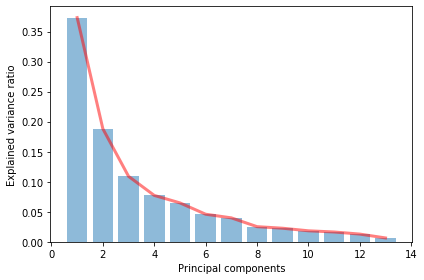

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(range(1, 14), var_exp, alpha=0.5, linewidth=3, color='red')
plt.bar(range(1, 14), var_exp, alpha=0.5)

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.tight_layout()
plt.show()

# As we can see the plot and above code, the first 2 PCs could explain the variance about 0.56146 (PC1: 0.37329 + PC2: 0.18818)

###### (C) + (D)

In [25]:
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i])for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
              eigen_pairs[1][1][:,np.newaxis]))
# w

In [26]:
x_train_pca = x_train_std @w
# x_train_pca

In [27]:
import pandas as pd
x_train_pca_df = pd.DataFrame(x_train_pca,columns=["PC1", "PC2"])
# x_train_pca_df

In [28]:
y_train_df = pd.DataFrame(y_train,columns=['Class label'])
# y_train

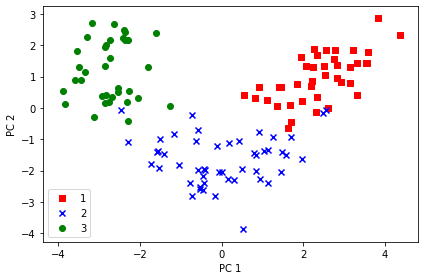

In [29]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o'] 

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_train_pca[y_train==l, 0], 
                x_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

###### (E)

In [30]:
from sklearn.decomposition import PCA

In [31]:
# df_wine.head()

In [32]:
scaler = StandardScaler()
scaler.fit(df_wine)
df_scaled = scaler.transform(df_wine)
pca = PCA()
pca.fit(df_scaled)
x_pca = pca.transform(df_scaled)
loading = pd.DataFrame(pca.components_, columns = df_wine.columns)

In [33]:
loading1 = loading[0:2]
loading2 = loading1[['x1','x2','x3','x4','x5','x6','x7', 'x9', 'x10', 'x11', 'x12', 'x13']]

In [34]:
loading2

,x1,x2,x3,x4,x5,x6,x7,x9,x10,x11,x12,x13
0,-0.136325,0.222676,-0.002258,0.224298,-0.124630,-0.359264,-0.390712,-0.279063,0.089318,-0.276823,-0.350526,-0.269515
1,-0.484161,-0.223591,-0.315856,0.011616,-0.300551,-0.067120,0.001313,-0.041223,-0.529783,0.277907,0.162776,-0.366059


In [35]:
# As we can see, In case of PC1, x7 could be most accounted because their absolute value is 0.39
# In case of PC2, X10 could be most accounted because their absolute value is 0.52